Epoch 1/10, Average Loss: 3165.0787, Mean Squared Error: 2965.5082
Epoch 2/10, Average Loss: 1452.4087, Mean Squared Error: 3011.4948
Epoch 3/10, Average Loss: 1427.8663, Mean Squared Error: 3019.4357
Epoch 4/10, Average Loss: 1708.2653, Mean Squared Error: 2983.1438
Epoch 5/10, Average Loss: 1524.6261, Mean Squared Error: 3005.9142
Epoch 6/10, Average Loss: 1474.3416, Mean Squared Error: 2962.1326
Epoch 7/10, Average Loss: 1526.5893, Mean Squared Error: 2934.0223
Epoch 8/10, Average Loss: 1605.1808, Mean Squared Error: 3037.8779
Epoch 9/10, Average Loss: 1448.4003, Mean Squared Error: 3087.4065
Epoch 10/10, Average Loss: 1404.8105, Mean Squared Error: 2968.1617


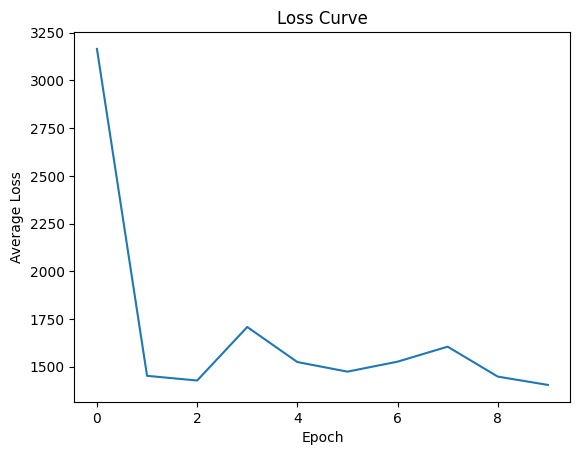

Estimated coefficients (intercept, slope): [151.32286069  -5.20386956 -18.29475083  26.43397173  17.36387758
 -14.13157558   7.05491856  -7.78906102  10.28437819  24.85030075
   3.15682404]


In [4]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the Diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target.reshape(-1, 1)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add bias term to features
X_b = np.c_[np.ones((X.shape[0], 1)), X]

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def stochastic_gradient_descent(X, y, learning_rate=0.01, epochs=10):
    m, n = X.shape
    theta = np.random.randn(n, 1)

    losses = []
    for epoch in range(epochs):
        total_loss = 0

        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]

            prediction = xi.dot(theta)
            error = prediction - yi

            gradient = xi.T.dot(error)

            theta = theta - learning_rate * gradient

            loss = 0.5 * np.mean(error**2)
            total_loss += loss

        average_loss = total_loss / m
        losses.append(average_loss)

        y_pred = X_b.dot(theta)
        mse = mean_squared_error(y, y_pred)
        print(f"Epoch {epoch+1}/{epochs}, Average Loss: {average_loss:.4f}, Mean Squared Error: {mse:.4f}")

    return theta, losses

theta, losses = stochastic_gradient_descent(X_b, y, learning_rate=0.01, epochs=10)

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.title('Loss Curve')
plt.show()

print("Estimated coefficients (intercept, slope):", theta.ravel())
